# Importing Libraries for EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

- " %matplotlib inline " makes life easy by returning output plots without needing to write plt.show() code everytime after each plot!

# Loading dataset

In [61]:
feature_names = ['age','workclass','fnlwgt','education','education_num',
'marital_status','occupation'
,'relationship','race',
'sex',
'capital_gain',
'capital_loss',
'hours_per_week',
'native_country',
'yearly_income'
]

In [34]:
len(feature_names)

15

In [65]:
df = pd.read_csv('data.csv',sep=',')
df.columns = feature_names
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


- Original data is seperated by delimiter " , " in given dataset
- " .head() " returns first five observations of the dataset

# Data Exploration

In [36]:
df.shape 

(32560, 15)

- dataset comprises of 32560 observations and 15 features 


In [37]:
df.columns.values 

array(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'yearly_income'], dtype=object)

- Label of each column

In [38]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int64
workclass         32560 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education_num     32560 non-null int64
marital_status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital_gain      32560 non-null int64
capital_loss      32560 non-null int64
hours_per_week    32560 non-null int64
native_country    32560 non-null object
yearly_income     32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- Data has only int and object values
- No variable column has null/missing values

# Summary Statistics

In [39]:
df.describe() 

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Key Observations - 

- Considering the uneven distribution of quartile values in the features we can assume that there are outliers existing for most of these features

# Understanding Target variable

In [40]:
df.yearly_income.unique()

array([' <=50K', ' >50K'], dtype=object)

- Target variable/Dependent variable is discrete and categorical in nature.
- Target variable has two possible classes '<=50K' and '>50K'

In [41]:
df.yearly_income.value_counts()

 <=50K    24719
 >50K      7841
Name: yearly_income, dtype: int64

- This tells us vote count of each yearly income label in descending order.
- "yearly_income" has most values concentrated in the category <50K.
- We have a problem of skewed classes thereby introducing a bias in the data.

# Data Visualization ( Visualization 1-2)

# To check missing values

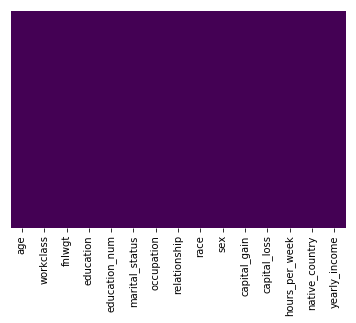

In [42]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

- Dataset has no missing values.
- If there were any, you would've noticed in figure represented by different colour shade on purple background.


# To check correlation

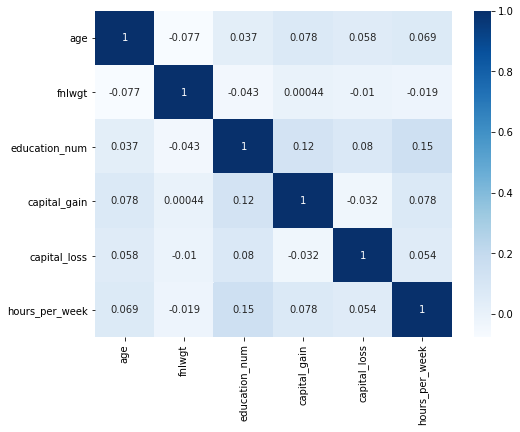

In [43]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='Blues',annot=True) 

# Visualization writeup

- Dark shades represents positive correlation while lighter shades represents negative correlation.
- There exists no strong positive/negative correlation amongst the features.
- In the case of a heat map we have two keys (feature 1 and feature 2) and one value (correlation).
- We use separately aligned square grid as marks (area) and shade of the area as a channel for quantitative value (correlation)
- Task is to find correlation/ outliers


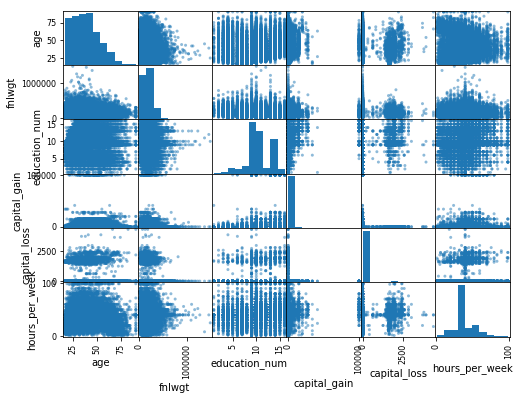

In [44]:
pd.plotting.scatter_matrix(df, figsize=(8, 6))
plt.show()

- The graphical representation confirms our belief of no interesting correlation.

# Visualization writeup

- Scatter plot matrix is used to find correlation amongst variables.
- There exists no strong positive/negative correlation amongst the features.
- Each individual feature pair has a scatter plot which uses points as marks and position as channel.
- Task is to find correlation/ outliers


# To check Outliers

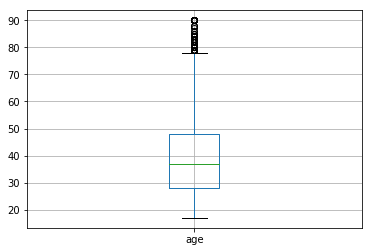

In [45]:
df.boxplot(column=['age'])

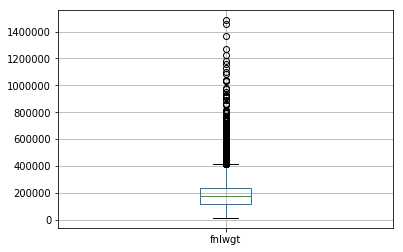

In [46]:
df.boxplot(column=['fnlwgt'])

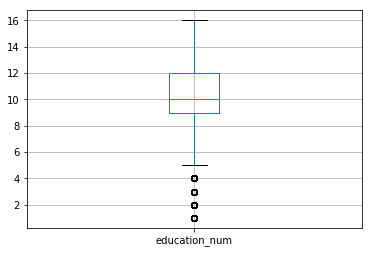

In [47]:
df.boxplot(column=['education_num'])

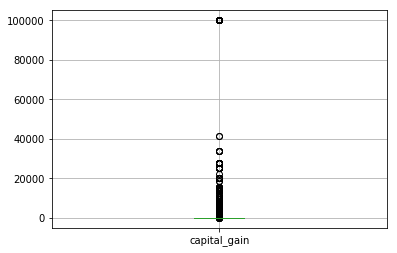

In [16]:
df.boxplot(column=['capital_gain'])

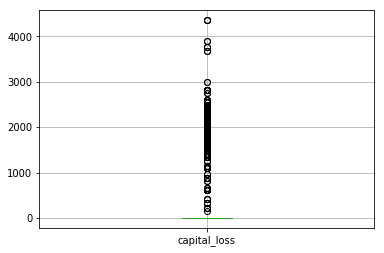

In [48]:
df.boxplot(column=['capital_loss'])

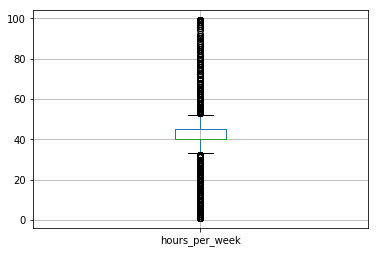

In [49]:
df.boxplot(column=['hours_per_week'])

- By observing the boxplots for each variable we conclude that columns 'age', 'fnlwgt', 'education_num', 'capital_loss', 'capital_gain', 'hours_per_week' contain outliers. 

# Check distribution of numerical features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000153D1CE57B8>,
      dtype=object)

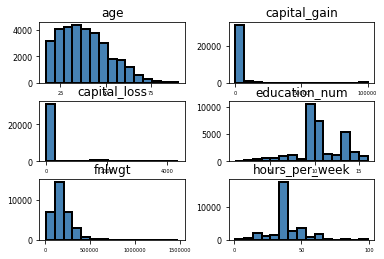

In [50]:
df.hist(column=['age', 'fnlwgt', 'education_num', 'capital_loss', 'capital_gain', 'hours_per_week'],\
       color='steelblue', edgecolor='black', linewidth=2.0,
xlabelsize=5, ylabelsize=8, grid=False, bins=15)

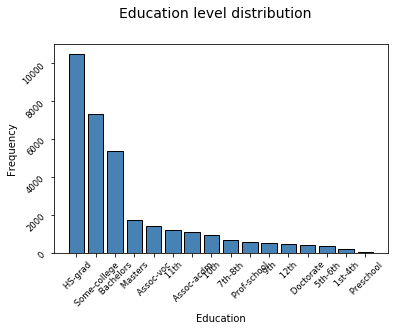

In [51]:
# Bar Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Education level distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.8)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Education")
ax.set_ylabel("Frequency") 
w_q = df['education'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5,rotation=45)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
edgecolor='black', linewidth=1)

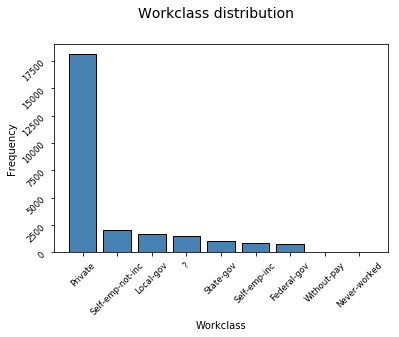

In [22]:
# Bar Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Workclass distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.8)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Workclass")
ax.set_ylabel("Frequency") 
w_q = df['workclass'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5,rotation=45)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
edgecolor='black', linewidth=1)

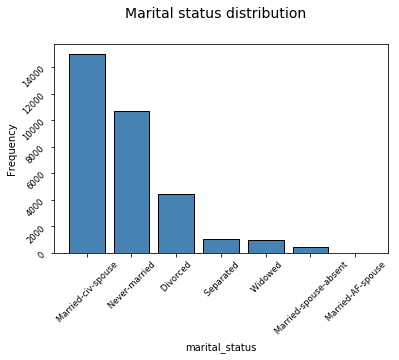

In [52]:
# Bar Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Marital status distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.8)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("marital_status")
ax.set_ylabel("Frequency") 
w_q = df['marital_status'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5,rotation=45)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
edgecolor='black', linewidth=1)

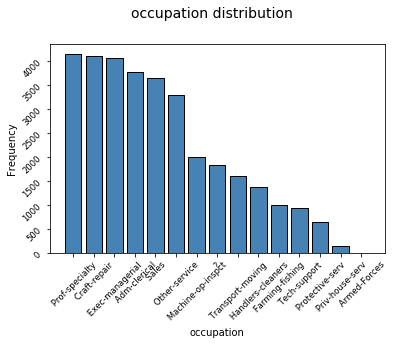

In [53]:
# Bar Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("occupation distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.8)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("occupation")
ax.set_ylabel("Frequency") 
w_q = df['occupation'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5,rotation=45)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
edgecolor='black', linewidth=1)

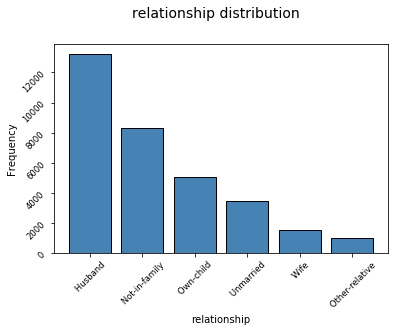

In [54]:
# Bar Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("relationship distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.8)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("relationship")
ax.set_ylabel("Frequency") 
w_q = df['relationship'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5,rotation=45)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
edgecolor='black', linewidth=1)

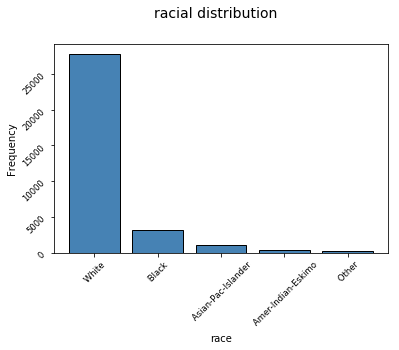

In [55]:
# Bar Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("racial distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.8)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("race")
ax.set_ylabel("Frequency") 
w_q = df['race'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5,rotation=45)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
edgecolor='black', linewidth=1)

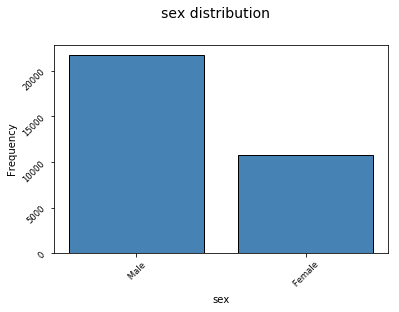

In [56]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("sex distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.8)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("sex")
ax.set_ylabel("Frequency") 
w_q = df['sex'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5,rotation=45)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
edgecolor='black', linewidth=1)

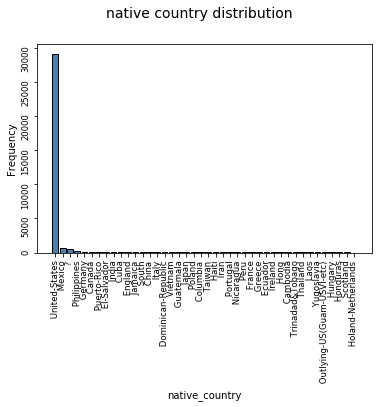

In [57]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("native country distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.8)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("native_country")
ax.set_ylabel("Frequency") 
w_q = df['native_country'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5,rotation=90)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
edgecolor='black', linewidth=1)

# Visualization write-up for distribution plots

- We use bars as marks and the length of these bars as channels in the bar charts
- The visualization help in conveying the information about frequency distribution (quantitative value through channels) of a categorical variable.
- The task is to represent frequency distribution efficiently.

# Observation
- all independent variables in our data are skewed.   

# Issues in the data that may need to be addressed prior to modeling

- The number of datapoints available for each class in dependent variable (yearly_income) are unequal and <b> biased </b> towards the class '<=50k'.
- Our data contains <b> nominal features </b> which need to be converted to numerical and <b> outliers</b> that need to be excluded.
- Various machine learning algorithms like KNN require numerical input data, so we need to <b> represent nominal columns in a numerical column</b>.
- Any algorithm, such as KNN, which cares about the distance between data points, may focus squarely and unfairly on variables with a larger range, a variable that may contain only noise, for all we know. This motivates <b>scaling/normalizing</b> our data

# Feature engineering to address issues

# Removing outliers from data using z-score technique

In [66]:
from sklearn import preprocessing
from scipy import stats

print('Before removing outliers',df.shape)
#removing outliers
df = df[(np.abs(stats.zscore(df.select_dtypes(exclude='object'))) < 3).all(axis=1)]
print('After Removing outliers',df.shape)
le = preprocessing.LabelEncoder()
le.fit(df['yearly_income'])
#encoding target variable
df['yearly_income'] = le.transform(df['yearly_income'])
df = pd.get_dummies(df)

Before removing outliers (32560, 15)
After Removing outliers (29827, 15)


- We removed outliers using z-score threshold of 3.
- LabelEncoder is used to change the 'yearly_income' column to 1 and 0.
- get_dummies is used to convert categorical features to numeric values.
- get_dummies creates a seperate column for each categorical feature value


In [73]:
df.shape

(29827, 106)

- The new dataset has 29827 datapoints and 106 columns


# Train and Test split

In [76]:
#shuffle data frame
df = df.sample(frac=1)
#dividing data into 80-20% splits
train_df = df[:round(0.8*len(df))]
test_df = df[round(0.8*len(df)):]

# Distribution of 'yearly_income' variable in data

In [77]:
train_df.yearly_income.value_counts()

0    18544
1     5318
Name: yearly_income, dtype: int64

- A sampling bias exists in our dataset

# Downsampling the over sampled class in 'yearly_income'

In [79]:
# Separate majority and minority classes
df_majority = train_df[train_df.yearly_income==0]
df_minority = train_df[train_df.yearly_income==1]
 
# Downsample majority class using number of datapoints in minority class
df_majority_downsampled = pd.DataFrame.sample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n= train_df.yearly_income.value_counts()[1],     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.yearly_income.value_counts()

1    5318
0    5318
Name: yearly_income, dtype: int64

- Both classes '<=50K' and '>50K' are now equally represented in the train data 

# Scaling the features using MinMaxScaler

In [81]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

X = df_downsampled.drop(['yearly_income'],axis=1)
#scale numeric features
X = min_max_scaler.fit_transform(X)
Y = df_downsampled['yearly_income']

# Fitting the KNN classifier

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
#Performing a gridsearch to get the best value of n_neighbors(k)
parameters = {'n_neighbors' :[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
#scoring = {'AUC': 'roc_auc'}

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, cv=10)
clf.fit(X,Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [110]:
clf.cv_results_

C:\Users\HP\Anaconda3.6\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\HP\Anaconda3.6\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\HP\Anaconda3.6\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\HP\Anaconda3.6\lib\site-packages\sklearn\utils\depr

{'mean_fit_time': array([0.09795175, 0.091714  , 0.09458234, 0.11477087, 0.10042367,
        0.10649061, 0.11281729, 0.1065172 , 0.10234821, 0.10936766]),
 'mean_score_time': array([0.99494433, 1.27100694, 1.38406904, 1.72066357, 1.77190635,
        1.90805364, 2.01985679, 2.1130743 , 2.11010034, 2.1468195 ]),
 'mean_test_score': array([0.7495299 , 0.73815344, 0.77980444, 0.7694622 , 0.78742008,
        0.78300113, 0.79221512, 0.78911245, 0.7930613 , 0.791651  ]),
 'mean_train_score': array([1.        , 0.87517244, 0.87246674, 0.84981827, 0.84781253,
        0.83770013, 0.83753294, 0.83126488, 0.83175593, 0.82852784]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors':

# Predicting test set labels

In [96]:
X_test = test_df.drop(['yearly_income'], axis = 1)
Y_test = test_df['yearly_income']
prediction = clf.predict(X_test)

In [97]:
import sklearn
print('Accuracy on test set = {}'.format(sklearn.metrics.accuracy_score(Y_test, prediction, normalize=True, sample_weight=None)))

Accuracy on validation set = 0.8051969823973177


# Visualization 3

In [112]:
from numpy import array
frame = {
  'rank_test_score': array([ 9, 10,  7,  8,  5,  6,  2,  4,  1,  3]),  
 'split0_test_score': array([0.7518797 , 0.74154135, 0.77631579, 0.76503759, 0.78007519,
        0.78571429, 0.78477444, 0.78383459, 0.79417293, 0.79511278]),
 'split1_test_score': array([0.75093985, 0.7424812 , 0.77067669, 0.76503759, 0.77349624,
        0.76691729, 0.78007519, 0.77631579, 0.78007519, 0.78289474]),
 'split2_test_score': array([0.73778195, 0.73684211, 0.77067669, 0.76785714, 0.78289474,
        0.78665414, 0.79793233, 0.79887218, 0.78853383, 0.79323308]),
 'split3_test_score': array([0.76503759, 0.74718045, 0.81015038, 0.79605263, 0.81672932,
        0.81109023, 0.82236842, 0.81109023, 0.82330827, 0.81954887]),
 'split4_test_score': array([0.7481203 , 0.73496241, 0.79417293, 0.78289474, 0.80639098,
        0.79605263, 0.81203008, 0.81109023, 0.80921053, 0.81015038]),
 'split5_test_score': array([0.7406015 , 0.72368421, 0.7593985 , 0.7424812 , 0.77161654,
        0.7612782 , 0.78383459, 0.77349624, 0.78571429, 0.78289474]),
 'split6_test_score': array([0.7462406 , 0.73026316, 0.78101504, 0.75845865, 0.78853383,
        0.78289474, 0.78571429, 0.78571429, 0.78947368, 0.78759398]),
 'split7_test_score': array([0.73778195, 0.73496241, 0.76691729, 0.75845865, 0.77819549,
        0.77349624, 0.77631579, 0.77161654, 0.78571429, 0.77255639]),
 'split8_test_score': array([0.75141243, 0.73352166, 0.77306968, 0.76647834, 0.77212806,
        0.76836158, 0.7740113 , 0.77495292, 0.77589454, 0.77306968]),
 'split9_test_score': array([0.76553672, 0.75612053, 0.79566855, 0.79190207, 0.80414313,
        0.79755179, 0.80508475, 0.80414313, 0.79849341, 0.79943503])}

- Using output from clf.cv_results_ we contruct a dataframe of k values vs test splits in 10 fold CV 

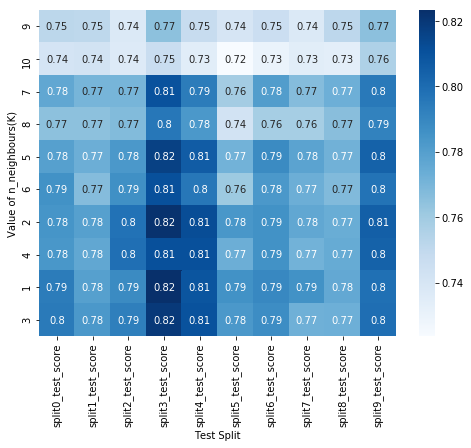

In [114]:
import pandas as pd
results = pd.DataFrame(frame)
plt.figure(figsize=(8,6))
results = results.set_index('rank_test_score')
ax = sns.heatmap(results,cmap='Blues',annot=True) 
ax.set(xlabel='Test Split', ylabel='Value of n_neighbours(K)')
plt.show()

# Visualization Write-up

- Dark shades represents high accuracy while lighter shades represents lower accuracy.
- In the case of a heat map we have two keys (Test split and value of n_neighbours) and one value (accuracy).
- We use separately aligned square grid as marks (area) and shade of the area as a channel for quantitative value (correlation)
- Task is to find best value of K for given split.

# Evaluating model performance

In [102]:
from sklearn.metrics import precision_recall_fscore_support,roc_auc_score
precision_recall_fscore_support(Y_test, prediction, average='binary',pos_label=0)

(0.8106074180254434, 0.9773169151004537, 0.8861900097943193, None)

 - above is the precision, recall and fscore for class 0 i.e. yearly_income = '<=50K'

In [103]:
precision_recall_fscore_support(Y_test, prediction, average='binary',pos_label=1)

(0.7265625, 0.2088323353293413, 0.3244186046511628, None)

- above is the precision, recall and fscore for class 1 i.e. yearly_income = '>50K'

In [104]:
print('Area Under the Receiver Operating Characteristic Curve (ROC AUC)={}'.format(roc_auc_score(Y_test, prediction)))

Area Under the Receiver Operating Characteristic Curve (ROC AUC)=0.5930746252148975
